#  Прогнозирование заказов такси

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импорт" data-toc-modified-id="Импорт-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Импорт</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Ресемплинг" data-toc-modified-id="Ресемплинг-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ресемплинг</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создание признаков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-на-тестовый-и-обучающий-наборы" data-toc-modified-id="Разделение-на-тестовый-и-обучающий-наборы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Разделение на тестовый и обучающий наборы</a></span></li><li><span><a href="#Подготовка-данных-для-коросс-валидации" data-toc-modified-id="Подготовка-данных-для-коросс-валидации-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Подготовка данных для коросс-валидации</a></span></li><li><span><a href="#Базовая-модель" data-toc-modified-id="Базовая-модель-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Базовая модель</a></span></li><li><span><a href="#Модели-с-параметрами-по-умолчанию" data-toc-modified-id="Модели-с-параметрами-по-умолчанию-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Модели с параметрами по умолчанию</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Настройка-гиперпараметров" data-toc-modified-id="Настройка-гиперпараметров-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Настройка гиперпараметров</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час.

**Цель:** Построить модель, предсказывающую количество заказов такси на следующий час.

**Целевая метрика:** *RMSE* на тестовой выборке должно быть не больше 48.

## Описание данных

**Файл с данными:** `/datasets/taxi.csv`

**Признаки:**
- `datetime` - Дата и время заказа,
- `num_orders` -Число заказов (целевой признак).

## Импорт

In [1]:
!pip install category_encoders

In [2]:
from category_encoders.target_encoder import TargetEncoder
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

SEED = 42
N_SPLITS = 10
N_JOBS = -1

%matplotlib inline

## Подготовка

### Загрузка данных

In [3]:
try:
    data = pd.read_csv('/datasets/taxi.csv')
    
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv')

### Знакомство с данными

Выведем общую информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Проверим содержат ли данные пропуски и полные дубликаты:

In [5]:
print(f'Данные содержат {data.isna().sum().sum()} пропусков.')

Данные содержат 0 пропусков.


In [6]:
print(f'Данные содержат {data.duplicated().sum()} дубликатов.')

Данные содержат 0 дубликатов.


Столбец `datetime` содержит дату и время заказов, преобразуем его в `datetime object`.

In [7]:
data['datetime'] = pd.to_datetime(data.datetime)

Назначим столбец с датой и временем индексом датафрейма, отсортируем индекс и проверим в хронологическом ли порядке расположены даты и время.

In [8]:
data = data.set_index('datetime').sort_index()

if data.index.is_monotonic:
    print('Данные расположены в хронологическом порядке.')
else:
    print('Хронологический порядок нарушен.')

Данные расположены в хронологическом порядке.


Выведем первые 10 строк получившегося датафрейма.

In [9]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


### Ресемплинг

Данные в таблице приведены с интервалом в 10 минут. Выполним ресемплинг, чтобы получить данные с интервалом в 1 час, будем использовать среднее значение за час и округлим результат до целых.

In [10]:
data = data.resample('1H').sum().round()
display(data.head())

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Анализ

### Исследование данных

Определим даты первого и последнего наблюдений.

In [11]:
print(f'Дата и время начала наблюдений: {data.index.min()}')

Дата и время начала наблюдений: 2018-03-01 00:00:00


In [12]:
print(f'Дата и время окончания наблюдений: {data.index.max()}')

Дата и время окончания наблюдений: 2018-08-31 23:00:00


Построим графики, иллюстрирующие поведение количества заказов во времени, тренд, сезонность и остатки. График сезонности построим за последние 120 часов, чтобы периодичность колебаний была различима.

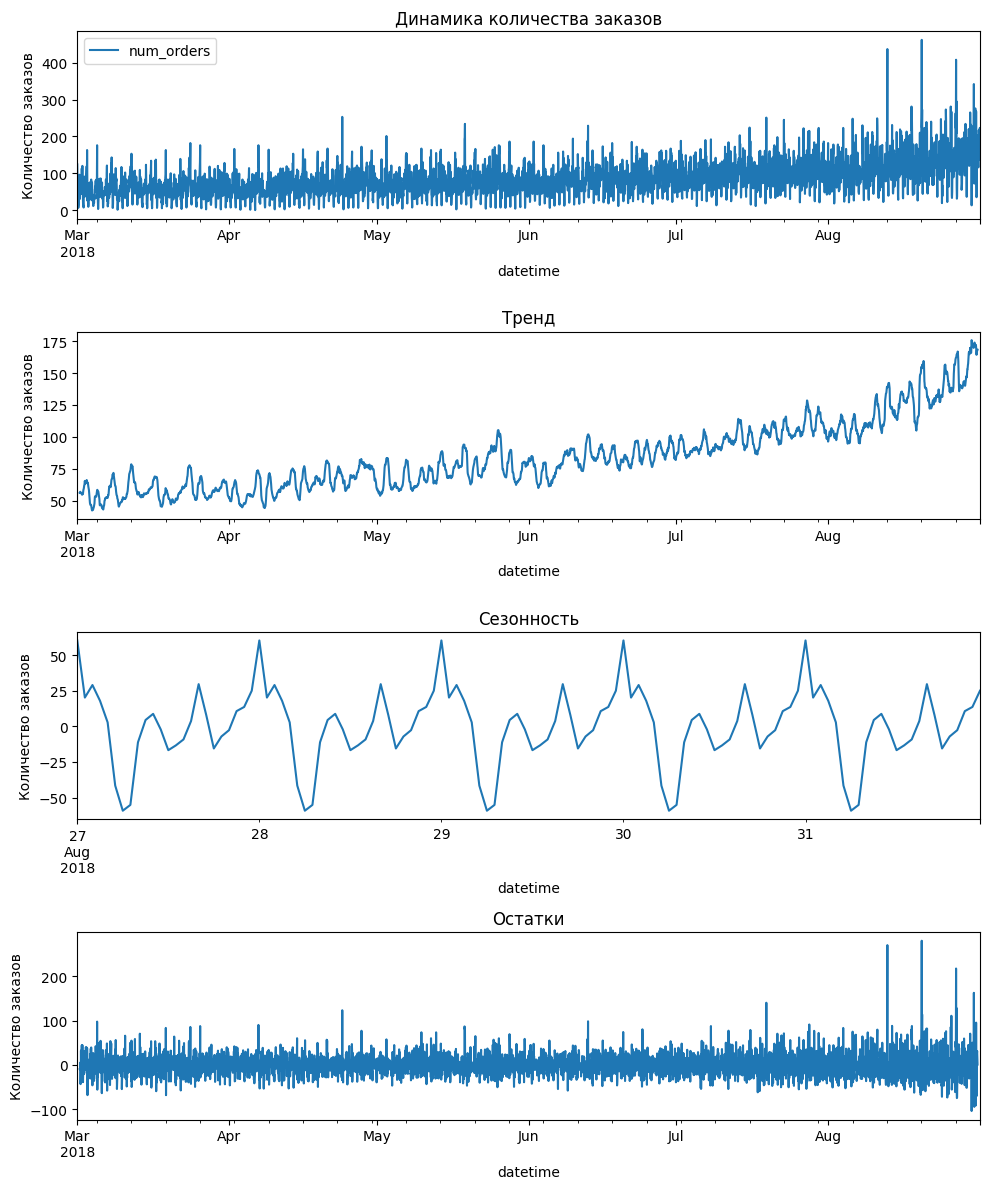

In [13]:
decomposed = seasonal_decompose(data)


fig, ax = plt.subplots(4, 1, figsize=(10, 12))

data.plot(title='Динамика количества заказов', 
          ylabel='Количество заказов', 
          ax = ax[0]
         )

decomposed.trend.plot(title='Тренд', 
                      ylabel='Количество заказов',
                      ax = ax[1]
                     )

decomposed.seasonal.tail(120).plot(title='Сезонность', 
                         ylabel='Количество заказов',
                         ax = ax[2]
                        )

decomposed.resid.plot(title='Остатки', 
                         ylabel='Количество заказов',
                         ax = ax[3]
                        )


plt.tight_layout()
plt.show()

На графике заказов наблюдается тренд. Также присутствует сезонность c периодичностью примерно 24 часа; у суточной сезонности присутствует ряд пиков. На графике остатков можно заметить, что стандартное отклонение в июле и августе немного выше, чем в другие месяцы, присутствуют выбросы.

Посмотрим гистограмму остатков.

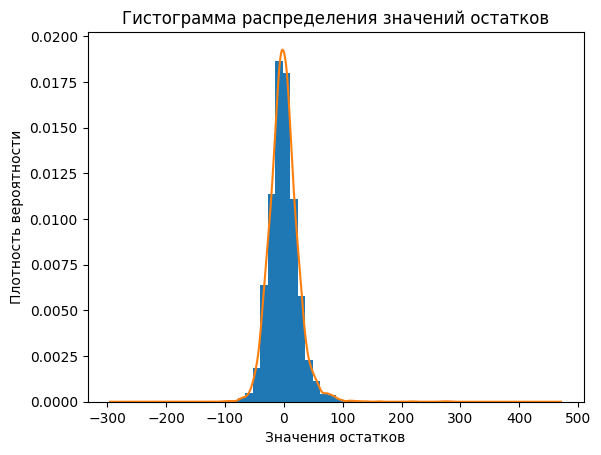

In [14]:
decomposed.resid.hist(bins=30, density=True)
decomposed.resid.plot.kde()

plt.title("Гистограмма распределения значений остатков")
plt.xlabel("Значения остатков")
plt.ylabel("Плотность вероятности")

plt.show()

Распределение значений остатков по форме близко к нормальному при этом на гистограмме присутствуют выбросы - значения, лежащие за пределами -20 и 20.

### Создание признаков

Создадим отдельные признки для месяца, числа месяца, дня недели и часа.

In [15]:
data['month'] = data.index.month
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour

display(data.tail())

,num_orders,month,day,dayofweek,hour
datetime,,,,,
2018-08-31 19:00:00,136,8,31,4,19
2018-08-31 20:00:00,154,8,31,4,20
2018-08-31 21:00:00,159,8,31,4,21
2018-08-31 22:00:00,223,8,31,4,22
2018-08-31 23:00:00,205,8,31,4,23


Чтобы выделить тренд, добавим к данным недельное скользящее среднее.

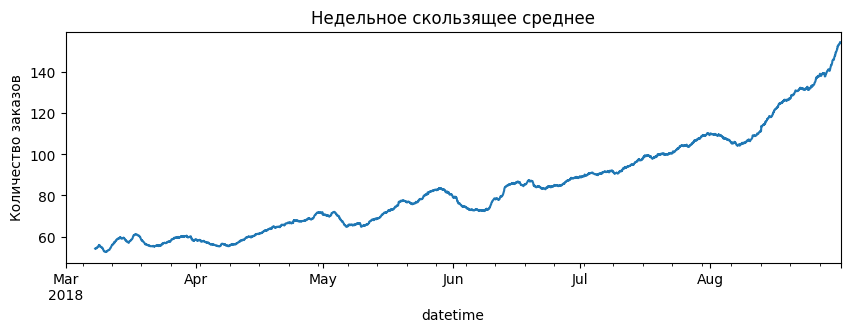

,num_orders,month,day,dayofweek,hour,moving_average
datetime,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN
2018-03-01 01:00:00,85,3,1,3,1,NaN
2018-03-01 02:00:00,71,3,1,3,2,NaN
2018-03-01 03:00:00,66,3,1,3,3,NaN
2018-03-01 04:00:00,43,3,1,3,4,NaN


In [16]:
data['moving_average'] = data.num_orders.shift(1).rolling(24 * 7).mean()

data.moving_average.plot(figsize=(10, 3), 
                         title='Недельное скользящее среднее', 
                         ylabel='Количество заказов'
                        )

plt.show()

display(data.head())

Как было отмечено ранее в данных присутствует сезонность равная примерно 24 часам, также возможно наличие недельной сезонности, поэтому также добавим 168 запаздывающих значения.

In [17]:
for i in range(24 * 7):
    data[f'lag_{i}'] = data.num_orders.shift(i + 1)

В начале набора данных образовались пропущенные значения, удалим их.

In [18]:
data = data.dropna()

## Обучение

### Разделение на тестовый и обучающий наборы

Прежде чем приступать к разарботке моделей раделим датасет на тестовую и обучающую выборки, а также вынесем целевой признак в отдельную переменную.

In [19]:
y = data.num_orders.copy()
X = data.drop(columns=['num_orders'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=SEED)

### Подготовка данных для коросс-валидации

Выполним разделение тренировочного множества на группы с помощью `sklearn.model_selection.TimeSeriesSplit`.

In [20]:
cv_splits = list(TimeSeriesSplit(n_splits=N_SPLITS).split(X_train, y_train))

### Базовая модель
В качестве базовой модели используем модель, предсказывающую новое значение $x(t)$ предыдущим значением ряда $x(t-1)$. Оценим качество её предсказаний.

In [21]:
class DummyTimeSeriesRegressor(BaseEstimator, RegressorMixin):  
    
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return X.lag_0

Оценим модель на тречнировочной выборке.

In [22]:
def evaluate_on_train(estimator, X, y, decimals=2, **kwargs):
    y_pred = estimator.fit(X, y, **kwargs).predict(X)
    print(f'RMSE = {mean_squared_error(y, y_pred, squared=False).round(decimals)}')
    print(f'R2 = {r2_score(y, y_pred).round(decimals)}')
    

print('DummyTimeSeriesRegressor (оценки на обучающей выборке):')
evaluate_on_train(estimator=DummyTimeSeriesRegressor(), 
                  X=X_train, 
                  y=y_train,
                 )

DummyTimeSeriesRegressor (оценки на обучающей выборке):
RMSE = 36.49
R2 = 0.12


Чтобы получить оценки, близкие к результатам на тестовом множесте, выполним кросс-валидацию.

In [23]:
def rmse_cv(estimator, X, y, cv=cv_splits, fit_params=None, n_jobs=N_JOBS, decimals=2):
    
    scores = cross_val_score(estimator=estimator,
                             X=X,
                             y=y,
                             scoring='neg_mean_squared_error',
                             fit_params=fit_params,
                             cv=cv,
                             n_jobs=n_jobs
                            )
    
    scores = pd.DataFrame(np.sqrt(-scores), columns=['RMSE'])
    return scores.agg(['min', 'mean', 'median', 'max', 'std']).round(decimals)


rmse_cv(estimator=DummyTimeSeriesRegressor(),
        X=X_train, 
        y=y_train
       )

,RMSE
min,29.05
mean,36.78
median,35.14
max,48.18
std,5.99


In [24]:
def r2_cv(estimator, X, y, cv=cv_splits, fit_params=None, n_jobs=N_JOBS, decimals=2):
    
    scores = cross_val_score(estimator=estimator,
                             X=X,
                             y=y,
                             scoring='r2',
                             fit_params=fit_params,
                             cv=cv,
                             n_jobs=n_jobs
                            )
    
    scores = pd.DataFrame(scores, columns=['R2'])
    return scores.agg(['min', 'mean', 'median', 'max', 'std']).round(decimals)
    
    
r2_cv(estimator=DummyTimeSeriesRegressor(), 
      X=X_train, 
      y=y_train
     )

,R2
min,-0.32
mean,-0.11
median,-0.06
max,0.04
std,0.14


### Модели с параметрами по умолчанию

#### Линейная регрессия

Попробуем применить линейную регрессию с регуляризацией. Чтобы избежать искажений расстояний в духе "11 часов больше 0 часов" закодируем категориальные переменные `category_encoders.target_encoder.TargetEncoder`.

In [25]:
ridge_regr = Pipeline([
    ('encoder', TargetEncoder(cols=['month', 'day', 'dayofweek', 'hour'])),
    ('standard_scaler', StandardScaler()),
    ('regressor', Ridge())
])

Оценим модель на тречнировочной выборке.

In [26]:
print('RidgeRegressor (оценки на обучающей выборке):')
evaluate_on_train(estimator=ridge_regr, 
                  X=X_train, 
                  y=y_train,
                 )

RidgeRegressor (оценки на обучающей выборке):
RMSE = 20.22
R2 = 0.73


Чтобы получить оценки, близкие к результатам на тестовом множесте, выполним кросс-валидацию.

In [27]:
rmse_cv(estimator=ridge_regr, 
        X=X_train, 
        y=y_train
       )

,RMSE
min,20.73
mean,23.63
median,21.76
max,33.08
std,3.82


In [28]:
r2_cv(estimator=ridge_regr, 
      X=X_train, 
      y=y_train
     )

,R2
min,0.24
mean,0.53
median,0.57
max,0.64
std,0.11


#### RandomForestRegressor

Для древовидных моделей не важны масштабы признаков, поэтому можем использовать случайный лес без предобработки данных.

Оценим модель на тречнировочной выборке.

In [29]:
forest = RandomForestRegressor().fit(X_train, y_train)

In [30]:
print('RandomForestRegressor (оценки на обучающей выборке):')
evaluate_on_train(estimator=forest, 
                  X=X_train, 
                  y=y_train,
                 )

RandomForestRegressor (оценки на обучающей выборке):
RMSE = 8.0
R2 = 0.96


Оценим модель с помощью кросс-валидации.

In [31]:
rmse_cv(estimator=forest, 
        X=X_train, 
        y=y_train
       )

,RMSE
min,17.85
mean,22.11
median,21.17
max,30.48
std,3.77


In [32]:
r2_cv(estimator=forest, 
      X=X_train, 
      y=y_train
     )

,R2
min,0.55
mean,0.60
median,0.59
max,0.66
std,0.03


Случайный лес демонстрирует оверфитинг, при этом, результаты на кросс-валидации не сильно лучше, чем у линейной регрессии.

#### LightGBM

Оценим модель на тречнировочной выборке.

In [33]:
lgbm_regressor = LGBMRegressor(n_jobs=N_JOBS, num_threads=4)

In [34]:
print('LGBMRegressor (оценки на обучающей выборке):')
evaluate_on_train(estimator=lgbm_regressor, 
                  X=X_train, 
                  y=y_train,
                  categorical_feature=['month', 'day', 'dayofweek', 'hour'],
                 )

LGBMRegressor (оценки на обучающей выборке):
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


RMSE = 8.72
R2 = 0.95


Оценим модель с помощью кросс-валидации.

In [35]:
rmse_cv(estimator=lgbm_regressor, 
        X=X_train, 
        y=y_train,
        fit_params=dict(categorical_feature=['month', 'day', 'dayofweek', 'hour']),
       )

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

,RMSE
min,19.29
mean,22.48
median,21.62
max,29.88
std,3.41


In [36]:
r2_cv(estimator=lgbm_regressor, 
      X=X_train, 
      y=y_train,
      fit_params=dict(categorical_feature=['month', 'day', 'dayofweek', 'hour']),
     )

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

,R2
min,0.53
mean,0.59
median,0.59
max,0.63
std,0.03


`lgbm_regressor` демонстрирует чуть более высокую точность, чем линейная регрессия и чуть меньший оверфитинг, чем случайный лес. Попробуем настроить гиперпараметры для `ridge_regr` и `lgbm_regressor`.

### Настройка гиперпараметров

Попробуем подобрать "силу" регуляризации для линейной регрессии.

In [37]:
params = {'regressor__alpha': [0.1, 1.0, 10, 50, 100, 150]}

grid_search = GridSearchCV(estimator=ridge_regr,
                           param_grid=params,
                           scoring='neg_mean_squared_error',
                           cv=cv_splits,
                           n_jobs=N_JOBS,
                          )


grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_

grid_search.best_params_

{'regressor__alpha': 150}

Оценим получившуюся модель на полной обучающей выборке.

In [38]:
print('best_ridge (оценки на обучающей выборке):')
evaluate_on_train(estimator=best_ridge, 
                  X=X_train, 
                  y=y_train,
                 )

best_ridge (оценки на обучающей выборке):
RMSE = 20.24
R2 = 0.73


Оценим модель с помощью кросс-валидации.

In [39]:
linreg_rmse = rmse_cv(estimator=best_ridge, 
                      X=X_train, 
                      y=y_train
                     )

display(linreg_rmse)

models_performance = pd.DataFrame(index=['min', 'mean', 'median', 'max', 'std'])
models_performance['best_ridge'] = linreg_rmse

,RMSE
min,18.66
mean,22.21
median,20.97
max,30.84
std,3.65


In [40]:
r2_cv(estimator=best_ridge, 
      X=X_train, 
      y=y_train
     )

,R2
min,0.54
mean,0.60
median,0.59
max,0.65
std,0.03


Подберём гиперпараметры для `LGBMRegressor`.

In [41]:
params = {'num_leaves': [26, 31, 36],
          'max_depth': [50, 100, 150],
          'learning_rate': [0.05, 0.10, 0.15],
          'n_estimators': [50, 100, 150],
         }

grid_search = GridSearchCV(estimator=lgbm_regressor,
                           param_grid=params,
                           scoring='neg_mean_squared_error',
                           cv=cv_splits,
                           n_jobs=N_JOBS,
                          )


grid_search.fit(X_train, y_train, categorical_feature=['month', 'day', 'dayofweek', 'hour'])

best_lgbm = grid_search.best_estimator_

grid_search.best_params_

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:206

/opt/conda/envs/practicum/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


{'learning_rate': 0.05, 'max_depth': 50, 'n_estimators': 150, 'num_leaves': 31}

Оценим получившуюся модель на полной обучающей выборке.

In [42]:
print('best_lgbm (оценки на обучающей выборке):')
evaluate_on_train(estimator=best_lgbm, 
                  X=X_train, 
                  y=y_train,
                 )

best_lgbm (оценки на обучающей выборке):
RMSE = 10.84
R2 = 0.92


Оценим модель с помощью кросс-валидации.

In [43]:
lgbm_rmse = rmse_cv(estimator=best_lgbm, 
                    X=X_train, 
                    y=y_train
                   )

display(lgbm_rmse)

models_performance['best_lgbm'] = lgbm_rmse

,RMSE
min,17.64
mean,22.05
median,21.13
max,29.65
std,3.63


In [44]:
r2_cv(estimator=best_lgbm, 
      X=X_train, 
      y=y_train
     )

,R2
min,0.53
mean,0.60
median,0.60
max,0.66
std,0.04


Выведем сводную таблицу, содержащую оценки RMSE с помощью кросс-валидации после настройки гиперпараметров для обеих моделей.

In [45]:
models_performance

,best_ridge,best_lgbm
min,18.66,17.64
mean,22.21,22.05
median,20.97,21.13
max,30.84,29.65
std,3.65,3.63


Линейная регрессия и `LGBMRegressor` показывают примерно одинаковые результаты на кросс-валидации после настройки гиперпараметров, при этом, `LGBMRegressor` демонстрирует оверфитинг, поэтому остановимся на линейной регрессии.

## Тестирование

Оценим лучшую модель на тестовой выборке.

In [46]:
y_pred = best_ridge.predict(X_test)

print('Результаты лучшей модели на тестовой выборке')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Результаты лучшей модели на тестовой выборке
RMSE: 34.681134342240064
R2: 0.6532436053473931


Полученный резлуьтат удовлетворяет условию задачи: RMSE на тестовой выборке меньше 48.

Совместим на одном графике фактические и спрогнозированные значения.

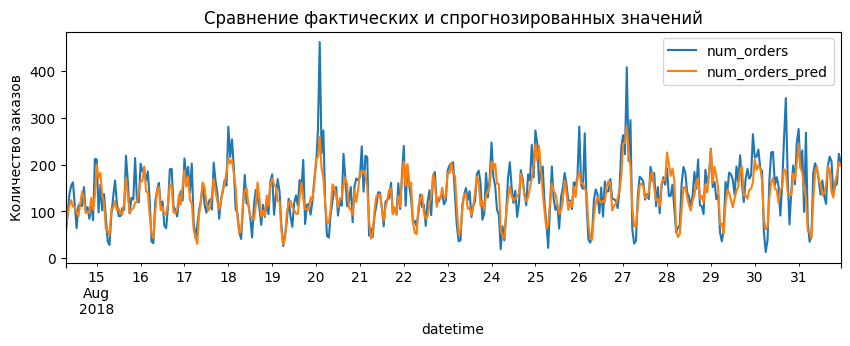

[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM]

[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM]

[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM]

[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM]

[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM]

In [47]:
test_data = pd.DataFrame(y_test)
test_data['num_orders_pred'] = y_pred

test_data.plot(title='Сравнение фактических и спрогнозированных значений', 
               ylabel='Количество заказов',
               figsize=(10, 3)
              )

plt.show()

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48